In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the Excel file and inspect sheet names
accident_df = pd.read_excel('Road Accident Data.xlsx')
accident_df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,BS0000002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,BS0000005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,BS0307969,2022-02-18,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,NaN,...,2,1,Northern,Dry,Single carriageway,60,07:00:00,Rural,Fine no high winds,Car
307969,BS0307970,2022-02-21,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,NaN,...,1,1,Northern,Frost or ice,Single carriageway,60,03:00:00,Rural,Fine no high winds,Car
307970,BS0307971,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,NaN,...,1,3,Northern,Frost or ice,Single carriageway,30,09:38:00,Rural,Fine no high winds,Car
307971,BS0307972,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,NaN,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25:00,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
accident_df.columns.tolist()

['Accident_Index',
 'Accident Date',
 'Day_of_Week',
 'Junction_Control',
 'Junction_Detail',
 'Accident_Severity',
 'Latitude',
 'Light_Conditions',
 'Local_Authority_(District)',
 'Carriageway_Hazards',
 'Longitude',
 'Number_of_Casualties',
 'Number_of_Vehicles',
 'Police_Force',
 'Road_Surface_Conditions',
 'Road_Type',
 'Speed_limit',
 'Time',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Vehicle_Type']

In [4]:
accident_df.rename(columns={'Accident Date': 'Accident_Date'}, inplace=True)

columns_to_use = [
    'Accident_Date', 'Day_of_Week', 'Accident_Severity',
    'Latitude', 'Local_Authority_(District)', 'Junction_Control',
    'Junction_Detail', 'Light_Conditions', 'Weather_Conditions',
    'Number_of_Casualties', 'Number_of_Vehicles', 'Vehicle_Type'
]

accident_df['Accident_Severity'] = accident_df['Accident_Severity'].replace('Fetal', 'Fatal')

In [5]:
accident_df.dtypes

Accident_Index                        object
Accident_Date                 datetime64[ns]
Day_of_Week                           object
Junction_Control                      object
Junction_Detail                       object
Accident_Severity                     object
Latitude                             float64
Light_Conditions                      object
Local_Authority_(District)            object
Carriageway_Hazards                   object
Longitude                            float64
Number_of_Casualties                   int64
Number_of_Vehicles                     int64
Police_Force                          object
Road_Surface_Conditions               object
Road_Type                             object
Speed_limit                            int64
Time                                  object
Urban_or_Rural_Area                   object
Weather_Conditions                    object
Vehicle_Type                          object
dtype: object

In [6]:
# Summary statistics
summary = {
    "Top 10 Accident Locations": accident_df['Local_Authority_(District)'].value_counts().head(10),
    "Top 5 Most Common Weather Conditions": accident_df['Weather_Conditions'].value_counts().head(5),
    "Top 5 Vehicle Types in Accidents": accident_df['Vehicle_Type'].value_counts().head(5),
    "Accident Severity Distribution": accident_df['Accident_Severity'].value_counts(),
    #"Monthly Accident Trend": accident_df['Month'].value_counts().sort_index()
}

summary 

{'Top 10 Accident Locations': Local_Authority_(District)
 Birmingham          6165
 Leeds               4140
 Manchester          3132
 Bradford            3006
 Westminster         2811
 Sheffield           2750
 Liverpool           2611
 Cornwall            2606
 Barnet              2302
 Bristol, City of    2270
 Name: count, dtype: int64,
 'Top 5 Most Common Weather Conditions': Weather_Conditions
 Fine no high winds       244496
 Raining no high winds     37841
 Other                      8802
 Snowing no high winds      4839
 Fog or mist                4783
 Name: count, dtype: int64,
 'Top 5 Vehicle Types in Accidents': Vehicle_Type
 Car                                     239794
 Van / Goods 3.5 tonnes mgw or under      15695
 Motorcycle over 500cc                    11226
 Bus or coach (17 or more pass seats)      8686
 Motorcycle 125cc and under                6852
 Name: count, dtype: int64,
 'Accident Severity Distribution': Accident_Severity
 Slight     263280
 Serious    

## High-Risk Locations (Hotspots)

In [7]:
# Number of accidents per district
hotspots = accident_df['Local_Authority_(District)'].value_counts().head(10)
hotspots


Local_Authority_(District)
Birmingham          6165
Leeds               4140
Manchester          3132
Bradford            3006
Westminster         2811
Sheffield           2750
Liverpool           2611
Cornwall            2606
Barnet              2302
Bristol, City of    2270
Name: count, dtype: int64

## Trends Over Time

In [8]:
# Add Month-Year, Day column for trend analysis
accident_df['Month'] = accident_df['Accident_Date'].dt.to_period('M').astype(str)
accident_df['Day'] =accident_df['Accident_Date'].dt.date


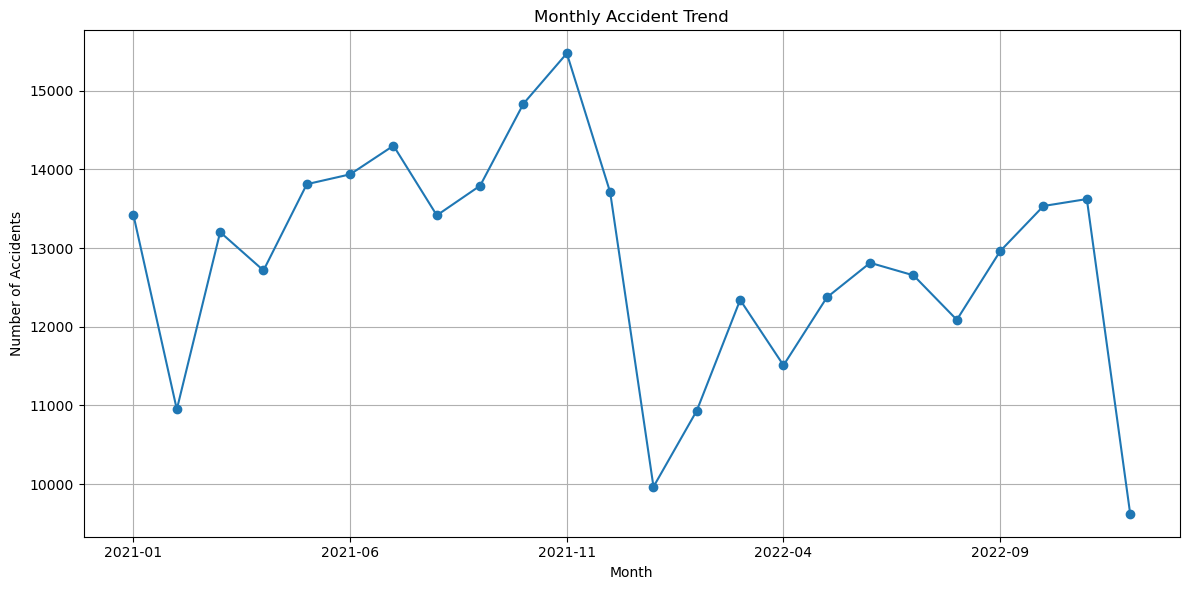

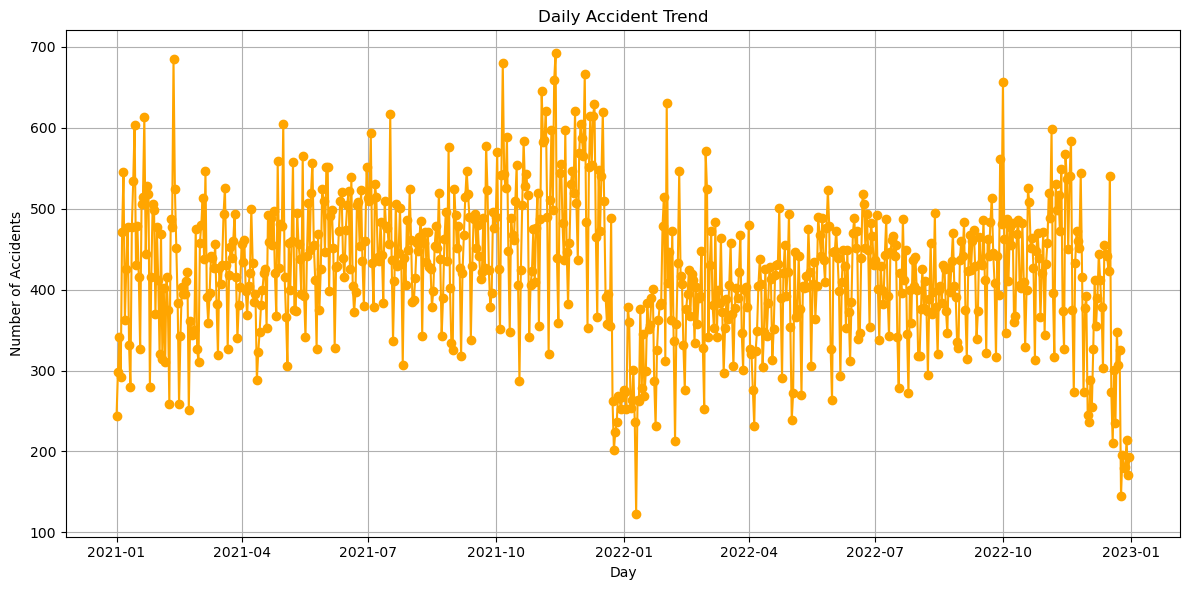

In [9]:
# Monthly, Daily trend
monthly_trend = accident_df.groupby('Month').size().sort_index()
daily_trend = accident_df.groupby('Day').size().sort_index()


# Plot Monthly Trend
plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line', marker='o')
plt.title("Monthly Accident Trend")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Daily Trend
plt.figure(figsize=(12, 6))
daily_trend.plot(kind='line', marker='o', color='orange')
plt.title("Daily Accident Trend")
plt.xlabel("Day")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.tight_layout()
plt.show()





##  Common Causes

### Junction-Related Causes

In [10]:
# Helps determine if lack of control (e.g. “Uncontrolled junctions”) is a major factor.
accident_df['Junction_Control'].value_counts(), " ------------------- ",accident_df['Junction_Detail'].value_counts()



(Junction_Control
 Give way or uncontrolled               150045
 Data missing or out of range            98056
 Auto traffic signal                     32256
 Not at junction or within 20 metres     25378
 Stop sign                                1685
 Authorised person                         460
 Auto traffic sigl                          93
 Name: count, dtype: int64,
 ' ------------------- ',
 Junction_Detail
 Not at junction or within 20 metres    123094
 T or staggered junction                 96718
 Crossroads                              29948
 Roundabout                              27264
 Private drive or entrance               10875
 Other junction                           8315
 Slip road                                4265
 More than 4 arms (not roundabout)        4148
 Mini-roundabout                          3346
 Name: count, dtype: int64)

### Light Conditions

In [11]:
# Identifies whether accidents are more common in:
# Daylight Darkness (with or without lights)
accident_df['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       227286
Darkness - lights lit           60093
Darkness - no lighting          16528
Darkness - lighting unknown      2924
Darkness - lights unlit          1142
Name: count, dtype: int64

In [12]:
# Weather Conditions
# How weather (e.g. rain, fog, fine) impacts accident rates.
accident_df['Weather_Conditions'].value_counts()


Weather_Conditions
Fine no high winds       244496
Raining no high winds     37841
Other                      8802
Snowing no high winds      4839
Fog or mist                4783
Raining + high winds       3526
Fine + high winds          3148
Snowing + high winds        538
Name: count, dtype: int64

### Road Surface Conditions

In [13]:
# To know if wet or icy roads contribute to most incidents
accident_df['Road_Surface_Conditions'].value_counts()


Road_Surface_Conditions
Dry                     208967
Wet or damp              81796
Frost or ice             12078
Snow                      4758
Flood over 3cm. deep       374
Name: count, dtype: int64

### Vehicle Types Involved

In [14]:
# checking if cars, motorbikes, or trucks are more frequently involved
accident_df['Vehicle_Type'].value_counts()


Vehicle_Type
Car                                      239794
Van / Goods 3.5 tonnes mgw or under       15695
Motorcycle over 500cc                     11226
Bus or coach (17 or more pass seats)       8686
Motorcycle 125cc and under                 6852
Goods 7.5 tonnes mgw and over              6532
Taxi/Private hire car                      5543
Motorcycle 50cc and under                  3703
Motorcycle over 125cc and up to 500cc      3285
Other vehicle                              2516
Goods over 3.5t. and under 7.5t            2502
Minibus (8 - 16 passenger seats)            821
Agricultural vehicle                        749
Pedal cycle                                  66
Ridden horse                                  3
Name: count, dtype: int64

In [15]:
pd.crosstab(accident_df['Weather_Conditions'],accident_df['Accident_Severity'])
pd.crosstab(accident_df['Light_Conditions'],accident_df['Accident_Severity'])


Accident_Severity,Fatal,Serious,Slight
Light_Conditions,,,
Darkness - lighting unknown,28,357,2539
Darkness - lights lit,862,8515,50716
Darkness - lights unlit,15,146,981
Darkness - no lighting,649,3078,12801
Daylight,2399,28644,196243


<Axes: title={'center': 'Accidents by Weather Condition'}, ylabel='Weather_Conditions'>

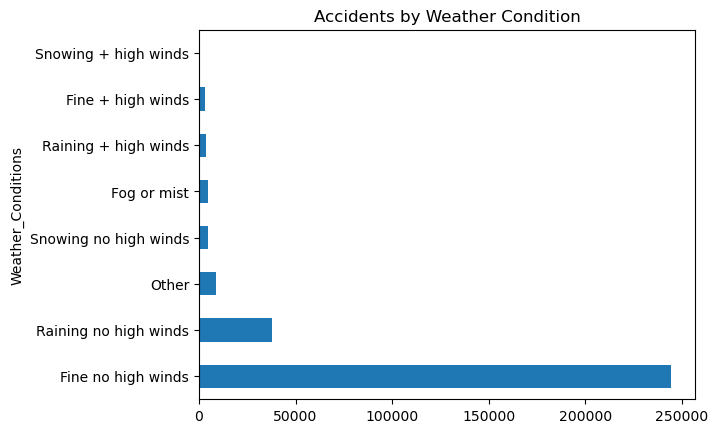

In [16]:
accident_df['Weather_Conditions'].value_counts().plot(kind='barh', title="Accidents by Weather Condition")


<Axes: title={'center': 'Accident Severity Distribution'}, xlabel='Accident_Severity'>

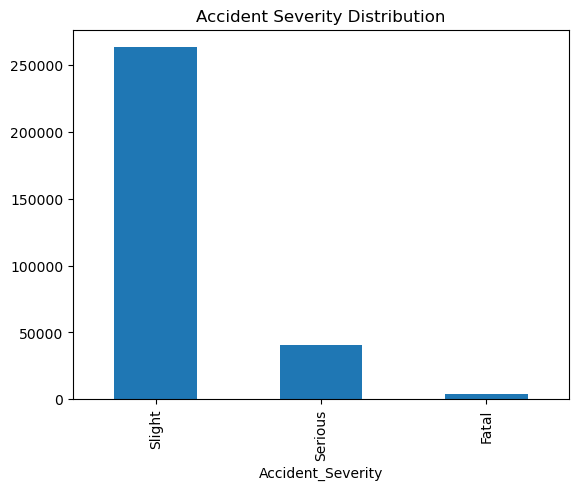

In [17]:
accident_df['Accident_Severity'].value_counts().plot(kind='bar', title='Accident Severity Distribution')


<Axes: title={'center': 'Monthly Accident Severity Trends'}, xlabel='Month'>

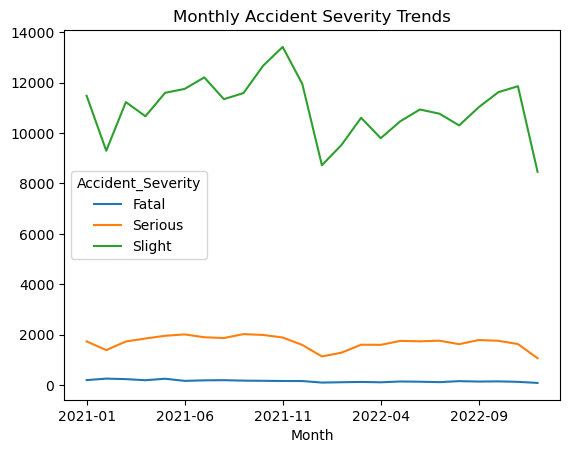

In [20]:
accident_df['Accident_Date'] = pd.to_datetime(accident_df['Accident_Date'])

severity_by_month = accident_df.groupby(['Month', 'Accident_Severity']).size().unstack()
severity_by_month.plot(kind='line', title='Monthly Accident Severity Trends')


In [21]:
accident_df.groupby(['Local_Authority_(District)', 'Accident_Severity']).size().unstack().fillna(0).sort_values(by='Fatal', ascending=False).head(10)


Accident_Severity,Fatal,Serious,Slight
Local_Authority_(District),,,
Westminster,189.0,387.0,2235.0
Camden,101.0,227.0,1343.0
Birmingham,57.0,706.0,5402.0
City of London,45.0,81.0,509.0
Cornwall,43.0,255.0,2308.0
Wiltshire,43.0,314.0,1233.0
East Riding of Yorkshire,39.0,294.0,1225.0
Shropshire,38.0,168.0,1137.0
Leeds,38.0,531.0,3571.0


 ### Severity vs Weather/Lighting

In [22]:
pd.crosstab(accident_df['Weather_Conditions'], accident_df['Accident_Severity'])
pd.crosstab(accident_df['Light_Conditions'], accident_df['Accident_Severity'])


Accident_Severity,Fatal,Serious,Slight
Light_Conditions,,,
Darkness - lighting unknown,28,357,2539
Darkness - lights lit,862,8515,50716
Darkness - lights unlit,15,146,981
Darkness - no lighting,649,3078,12801
Daylight,2399,28644,196243


### Weighted Severity Score

In [24]:
severity_weights = {'Fatal': 3, 'Serious': 2, 'Slight': 1}
accident_df['Severity_Score'] = accident_df['Accident_Severity'].map(severity_weights)
severity_by_location = accident_df.groupby('Local_Authority_(District)')['Severity_Score'].sum().sort_values(ascending=False)


In [26]:
severity_by_location

Local_Authority_(District)
Birmingham            6985
Leeds                 4747
Westminster           3576
Manchester            3493
Bradford              3423
                      ... 
Clackmannanshire        27
Alnwick                 25
South Shropshire        20
Teesdale                17
Berwick-upon-Tweed      16
Name: Severity_Score, Length: 422, dtype: int64